# `truevoice-intent` Dataset

This notebook performs a preliminary exploration of the `truevoice-intent` dataset which was provided by [TrueVoice](http://www.truevoice.co.th/) through Nattapote Kuslasayanon. The texts are transcribed from customer service phone calls to a mobile phone service provider using Truevoice's [Mari](http://www.truevoice.co.th/en/true-voice-mari/). This dataset is a part of [pyThaiNLP](https://github.com/PyThaiNLP/) Thai text [classification-benchmarks](https://github.com/PyThaiNLP/classification-benchmarks). `texts` column contains raw texts and `texts_deepcut` column contains those segmented by [deepcut](https://github.com/rkcosmos/deepcut).

The benchmark features a set of **three multi-class classification tasks** for `action`, `object`, and `destination` of all the calls. Performance metrics are macro- and micro-averaged accuracy, F1 score, precision and recall.

In [1]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

From the original `.xlsx` files we cleaned the datasets and saved them as `.csv`.

In [2]:
# all_df = pd.read_excel('mari_deepcut_train.xlsx')
# test_df = pd.read_excel('mari_deepcut_test.xlsx')

# #select only relevant columns
# selected = ['Sentence Utterance', 'Sentence Utterance (deep cut)',
#            'Action', 'Object', 'Destination']

# all_df = all_df[selected]
# test_df = test_df[selected]

# all_df.columns = ['texts', 'texts_deepcut', 'action', 'object', 'destination']
# test_df.columns = ['texts', 'texts_deepcut', 'action', 'object', 'destination']

# for i in range(2,5):
#     all_df.iloc[:,i] = all_df.iloc[:,i].map(lambda x: x.lower())
#     test_df.iloc[:,i] = test_df.iloc[:,i].map(lambda x: x.lower())
    
# all_df.to_csv('mari_train.csv',index=False)
# test_df.to_csv('mari_test.csv',index=False)

## Load Data

In [3]:
all_df = pd.read_csv('mari_train.csv')
print(all_df.shape)
all_df.head()

(12939, 5)


,texts,texts_deepcut,action,object,destination
0,ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต . บ...,ผม ไป จ่าย เงิน ที่ Counter Services เค้า เช็...,enquire,payment,billing and payment
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,internet ยัง ความ เร็ว อยุ่ เท่า ไหร ครับ,enquire,package,promotions
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,ตะกี้ ไป ชำระ ค่า บริการ ไป แล้ว แต่ ยัง ใช้ ...,report,suspend,billing and payment
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,พี่ ค่ะ ยัง ใช้ internet ไม่ ได้ เลย ค่ะ เป็น...,enquire,internet,internet
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,ฮาโหล คะ พอดี ว่า เมื่อ วาน เปิด ซิม ทรูมูฟ แ...,report,phone_issues,billing and payment


## Labels

### Label Distribution

(8, 3)


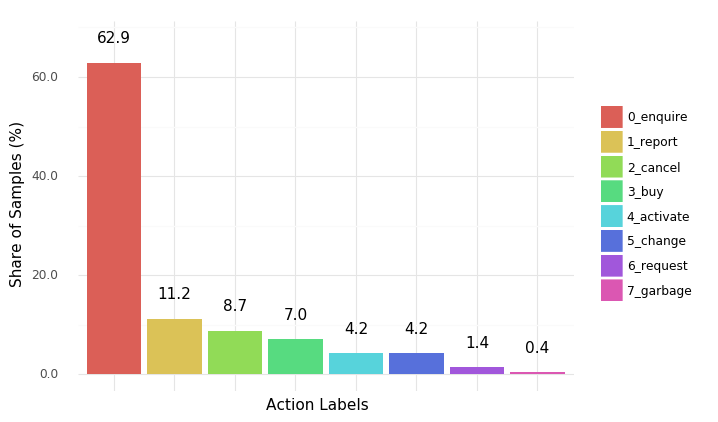

<ggplot: (-9223363245625134455)>

In [4]:
action_labels = pd.DataFrame(all_df.action.value_counts()).reset_index()
action_labels.columns = ['label','cnt']
action_labels['per'] = action_labels.cnt / np.sum(action_labels.cnt)
action_labels = action_labels.sort_values('cnt',ascending=False)
for i,row in action_labels.iterrows():
    action_labels.iloc[i,0] = f"{i}_{row['label']}"

print(action_labels.shape)
g = (ggplot(action_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Action Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.05',label='round(per*100,1)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

(26, 3)


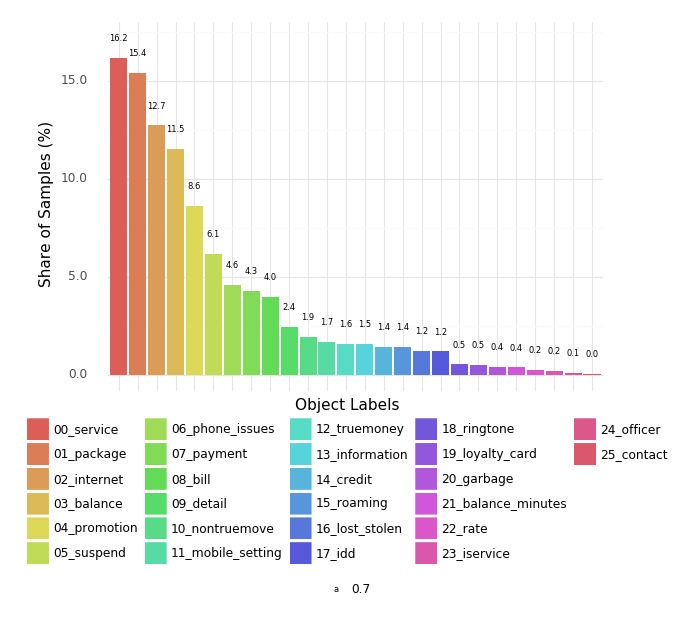

<ggplot: (8791229541661)>

In [5]:
object_labels = pd.DataFrame(all_df.object.value_counts()).reset_index()
object_labels.columns = ['label','cnt']
object_labels['per'] = object_labels.cnt / np.sum(object_labels.cnt)
object_labels = object_labels.sort_values('cnt',ascending=False)
for i,row in object_labels.iterrows():
    object_labels.iloc[i,0] = f"{i:02}_{row['label']}"

print(object_labels.shape)
g = (ggplot(object_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Object Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.01',label='round(per*100,1)',size=0.7)) +
    theme(axis_text_x = element_blank(),legend_title=element_blank(),legend_position='bottom'))
g

(7, 3)


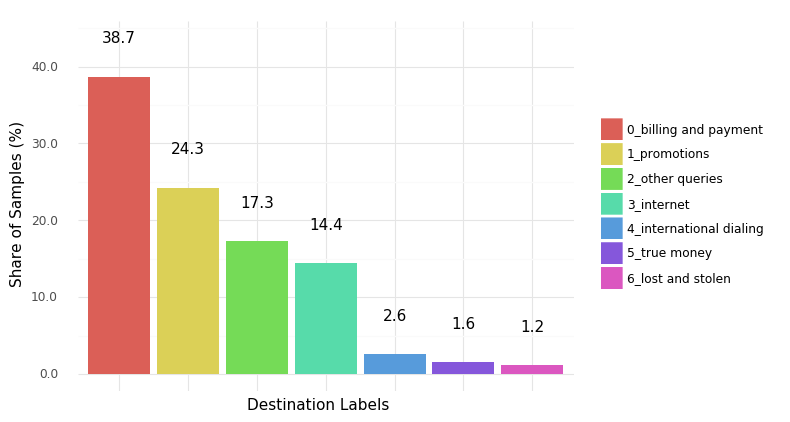

<ggplot: (8791229444549)>

In [6]:
destination_labels = pd.DataFrame(all_df.destination.value_counts()).reset_index()
destination_labels.columns = ['label','cnt']
destination_labels['per'] = destination_labels.cnt / np.sum(destination_labels.cnt)
destination_labels = destination_labels.sort_values('cnt',ascending=False)
for i,row in destination_labels.iterrows():
    destination_labels.iloc[i,0] = f"{i}_{row['label']}"

print(destination_labels.shape)
g = (ggplot(destination_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Destination Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.05',label='round(per*100,1)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

### Label Association

In [7]:
all_df[['action','destination']].pivot_table(index='action', 
                                             columns='destination', 
                                             aggfunc=len, fill_value=0)

destination,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money
action,,,,,,,
activate,518,30,0,0,0,0,0
buy,0,0,0,0,0,910,0
cancel,0,0,0,0,1132,0,0
change,94,0,0,0,0,449,0
enquire,3112,306,1862,0,872,1780,201
garbage,0,0,0,0,48,0,0
report,1283,0,0,157,4,0,0
request,0,0,0,0,181,0,0


In [8]:
all_df[['object','action']].pivot_table(index='object', 
                                             columns='action', 
                                             aggfunc=len, fill_value=0)

action,activate,buy,cancel,change,enquire,garbage,report,request
object,,,,,,,,
balance,0,0,0,0,1492,0,0,0
balance_minutes,0,0,0,0,47,0,0,0
bill,0,0,0,0,513,0,0,0
contact,0,0,0,0,0,0,4,0
credit,0,0,0,0,184,0,0,0
detail,0,0,0,94,218,0,0,0
garbage,0,0,0,0,0,48,0,0
idd,30,0,0,0,123,0,0,0
information,0,0,0,0,29,0,0,171


In [9]:
all_df[['object','destination']].pivot_table(index='object', 
                                             columns='destination', 
                                             aggfunc=len, fill_value=0)

destination,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money
object,,,,,,,
balance,1492,0,0,0,0,0,0
balance_minutes,47,0,0,0,0,0,0
bill,513,0,0,0,0,0,0
contact,0,0,0,0,4,0,0
credit,184,0,0,0,0,0,0
detail,312,0,0,0,0,0,0
garbage,0,0,0,0,48,0,0
idd,0,153,0,0,0,0,0
information,0,0,0,0,200,0,0


## Texts

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
texts_cnt = CountVectorizer(tokenizer=lambda x: x.split())
texts_mat = texts_cnt.fit_transform(all_df.texts_deepcut)
texts_mat.shape

(12939, 5216)

### Word Count Distribution

In [11]:
texts_wc = pd.DataFrame(texts_mat.sum(axis=1))
texts_wc.columns = ['word_count']

Average Text Word Count: 12.738619676945667


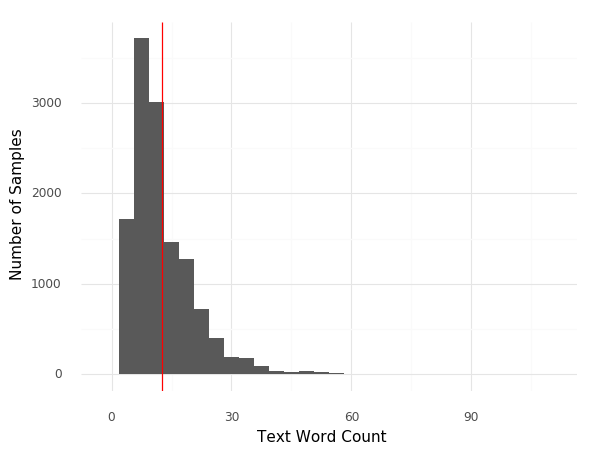

<ggplot: (-9223363245625333318)>

In [12]:
g = (ggplot(texts_wc, aes(x='word_count')) + geom_histogram(bins=30) + theme_minimal() +
    xlab('Text Word Count') + ylab('Number of Samples') + 
    geom_vline(xintercept = np.mean(texts_wc.word_count), color='red'))
print(f'Average Text Word Count: {np.mean(texts_wc.word_count)}')
g

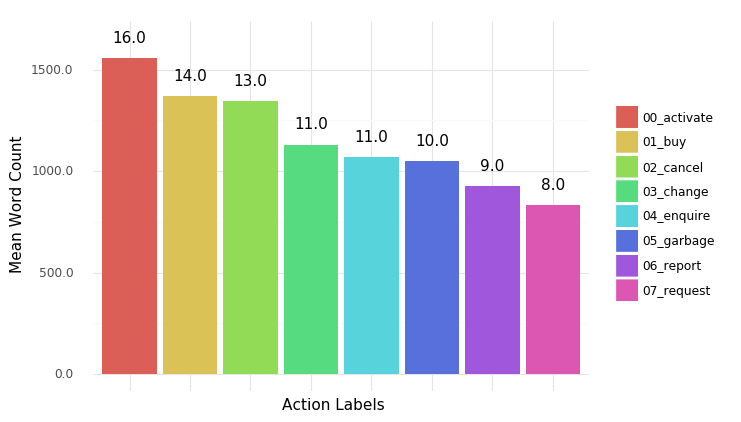

<ggplot: (8791229640975)>

In [13]:
all_df['wc'] = texts_wc['word_count']
action_agg = all_df[['action','wc']].groupby('action').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in action_agg.iterrows():
    action_agg.iloc[i,0] = f"{i:02}_{row['action']}"
g = (ggplot(action_agg,aes(x='action', y='wc', fill='action')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Action Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='action',y='wc+1',label='round(wc)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

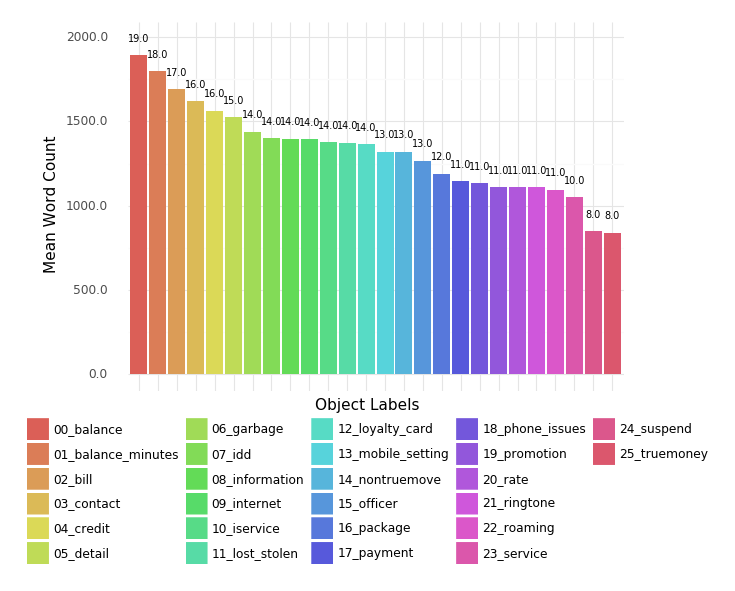

<ggplot: (-9223363245625448374)>

In [14]:
all_df['wc'] = texts_wc['word_count']
object_agg = all_df[['object','wc']].groupby('object').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in object_agg.iterrows():
    object_agg.iloc[i,0] = f"{i:02}_{row['object']}"
g = (ggplot(object_agg,aes(x='object', y='wc', fill='object')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Object Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='object',y='wc+1',label='round(wc)'), size = 7) +
    theme(axis_text_x = element_blank(),legend_title=element_blank(),legend_position='bottom'))
g

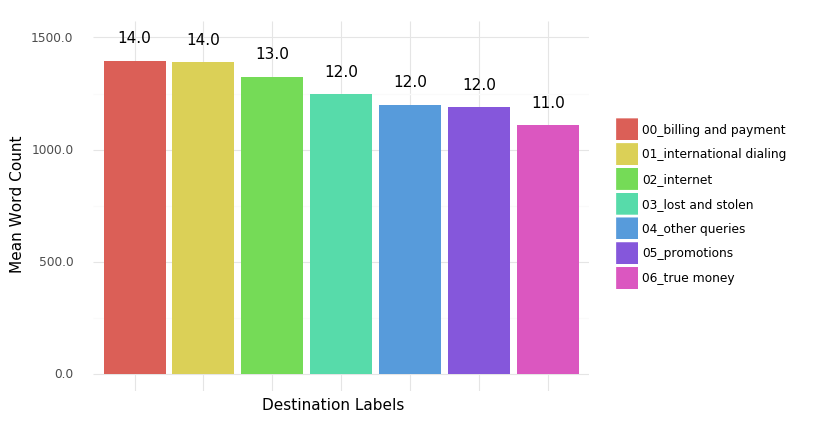

<ggplot: (8791224844229)>

In [15]:
all_df['wc'] = texts_wc['word_count']
destination_agg = all_df[['destination','wc']].groupby('destination').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in destination_agg.iterrows():
    destination_agg.iloc[i,0] = f"{i:02}_{row['destination']}"
g = (ggplot(destination_agg,aes(x='destination', y='wc', fill='destination')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Destination Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='destination',y='wc+1',label='round(wc)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

### Word Frequency

In [16]:
texts_top = pd.DataFrame({
    'vocab': list(texts_cnt.get_feature_names()),
    'cnt': np.asarray(texts_mat.sum(axis=0)).squeeze()}).sort_values('cnt',ascending=False)
texts_top = texts_top.reset_index(drop=True).reset_index()

Mean Word Frequency: 31.599884969325153


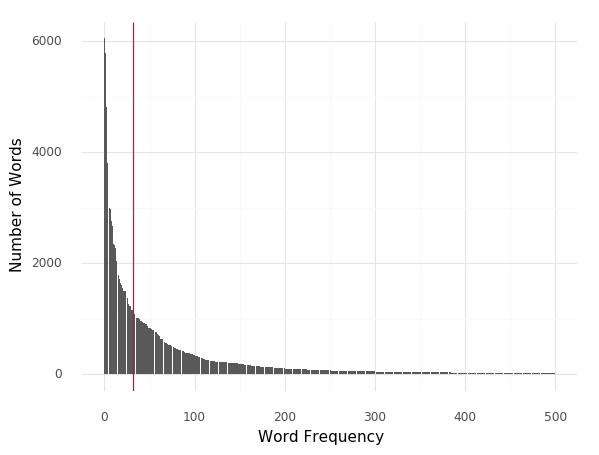

<ggplot: (-9223363245629932649)>

In [17]:
g = (ggplot(texts_top.iloc[:500,:], aes(x='index',y='cnt')) + 
     geom_bar(stat='identity') + 
     theme_minimal() +
     xlab('Word Frequency') + ylab('Number of Words') + 
     geom_vline(xintercept = np.mean(texts_top.cnt), color='red'))
print(f'Mean Word Frequency: {np.mean(texts_top.cnt)}')
g

In [18]:
texts_top.head(10)

,index,vocab,cnt
0,0,จะ,6052
1,1,ค่ะ,5784
2,2,ครับ,4813
3,3,ได้,3803
4,4,ไม่,3624
5,5,ใช้,3333
6,6,สอบถาม,2991
7,7,ผม,2978
8,8,ว่า,2768
9,9,แล้ว,2675


In [19]:
texts_top.tail(10)

,index,vocab,cnt
5206,5206,หารบกวน,1
5207,5207,ติตด่อไมได้,1
5208,5208,หายหง่ะ,1
5209,5209,ติดรหัส,1
5210,5210,หายอะครับ,1
5211,5211,ติดค่า,1
5212,5212,หายอ่ะ,1
5213,5213,หายไปคะ,1
5214,5214,หายไอ,1
5215,5215,รีเซ็ต,1


## Text Feature Correlations

In [20]:
from class_features import *
from sklearn.feature_extraction.text import TfidfVectorizer

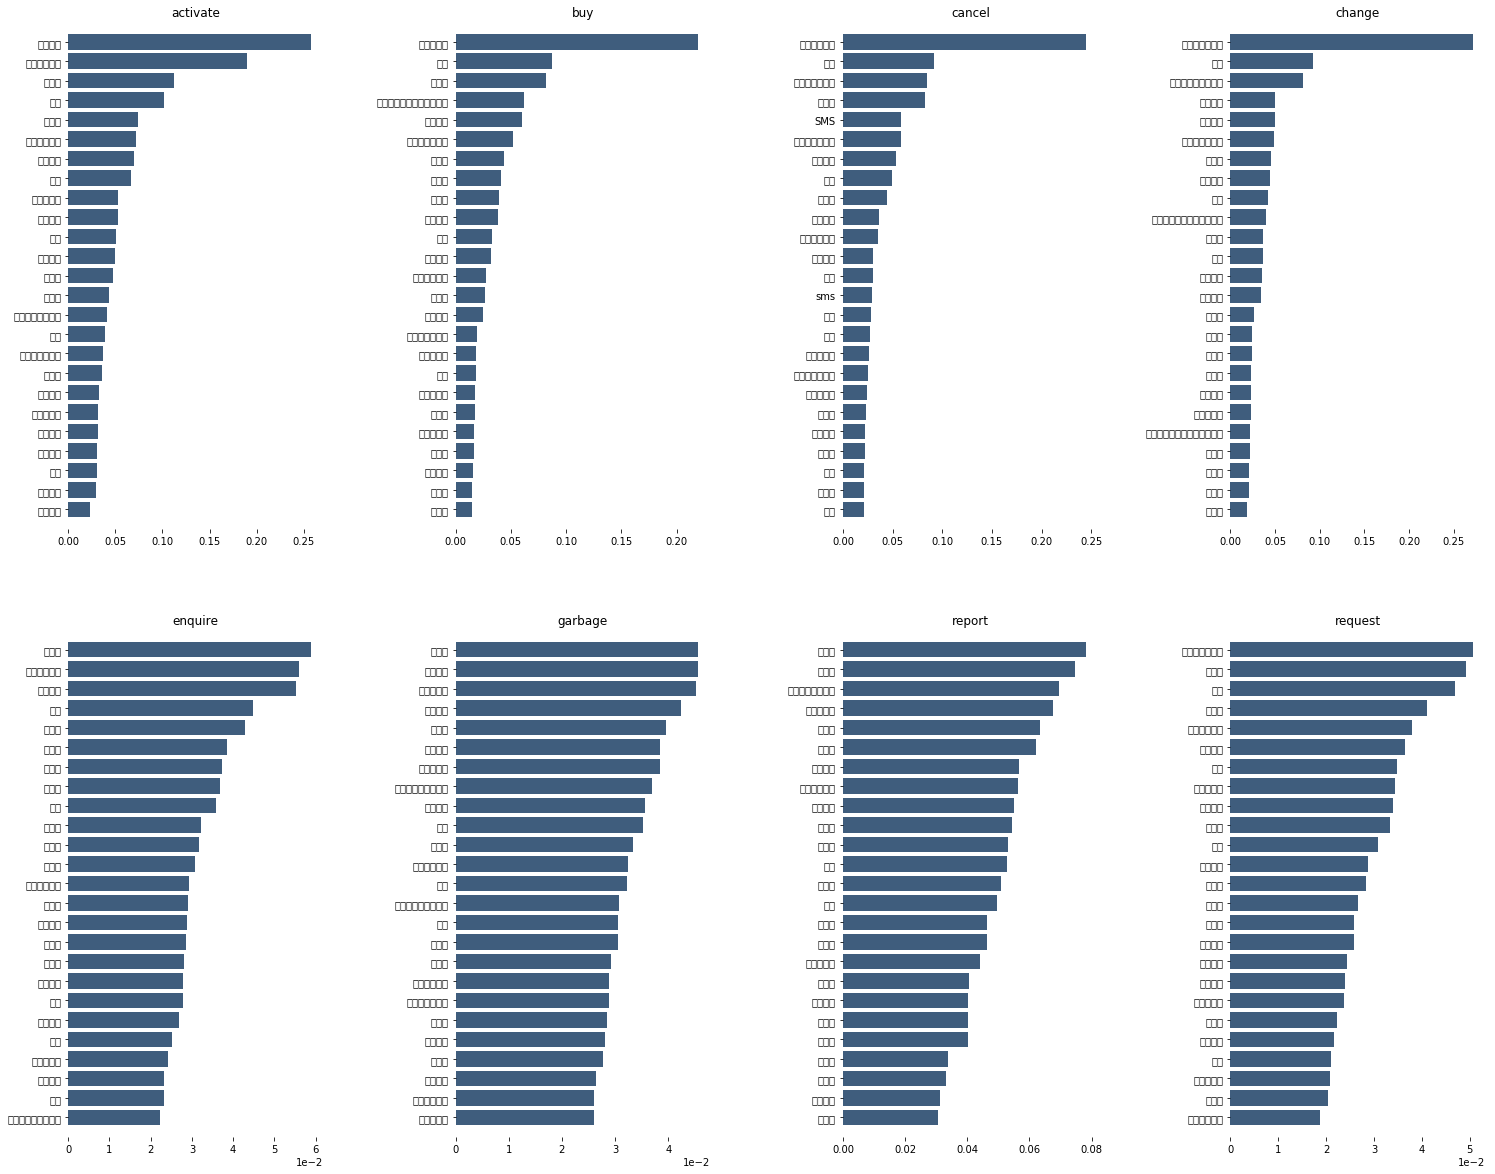

In [21]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='action'
)

In [ ]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='object',
    nrow=7,
    ncol=4
)

In [ ]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='destination'
)